In [3]:
# --- Cell 1: Import Libraries and Load Data ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries imported successfully!")

# Load the dataset
# This assumes 'US_Regional_Sales_Data.csv' is in the same folder as your notebook
try:
    df = pd.read_csv('US_Regional_Sales_Data.csv')
    print("Dataset 'US_Regional_Sales_Data.csv' loaded successfully!")
    print("\n--- First 5 Rows (df.head()) ---")
    print(df.head())
except FileNotFoundError:
    print("Error: 'US_Regional_Sales_Data.csv' not found.")
    print("Please make sure the file is in the same directory as your notebook.")
    df = None

# --- Cell 2: Initial Inspection ---
if df is not None:
    print("\n\n--- Cell 2: Initial Inspection ---")
    
    # Get a summary of all columns, data types, and non-null counts
    print("\n--- Data Structure & Types (df.info()) ---")
    df.info()
    
    # Get a statistical summary
    print("\n--- Statistical Summary (df.describe(include='all')) ---")
    # 'include="all"' shows stats for both numerical and categorical (text) columns
    print(df.describe(include='all'))


# --- Cell 3: Data Cleaning ---
if df is not None:
    print("\n\n--- Cell 3: Data Cleaning ---")
    # Based on df.info(), we need to clean dates and prices.
    
    # Create a copy to avoid changing the original data (good practice)
    df_clean = df.copy()
    
    # 1. Clean Price Columns (Unit Cost, Unit Price)
    # Remove '$', ',', and '"' characters and convert to numeric (float)
    try:
        df_clean['Unit Cost'] = df_clean['Unit Cost'].replace({'\$': '', ',': '', '"': ''}, regex=True).astype(float)
        df_clean['Unit Price'] = df_clean['Unit Price'].replace({'\$': '', ',': '', '"': ''}, regex=True).astype(float)
        print("Cleaned 'Unit Cost' and 'Unit Price' columns.")
    except Exception as e:
        print(f"Error cleaning price columns: {e}")
        
    # 2. Convert Date Columns
    # The dates appear to be in DD/MM/YY or DD/MM/YYYY format.
    # Using dayfirst=True tells pandas to read '31/5/18' as May 31, 2018.
    try:
        df_clean['OrderDate'] = pd.to_datetime(df_clean['OrderDate'], dayfirst=True)
        df_clean['ShipDate'] = pd.to_datetime(df_clean['ShipDate'], dayfirst=True)
        df_clean['DeliveryDate'] = pd.to_datetime(df_clean['DeliveryDate'], dayfirst=True)
        df_clean['ProcuredDate'] = pd.to_datetime(df_clean['ProcuredDate'], dayfirst=True)
        print("Converted date columns to datetime objects.")
    except Exception as e:
        print(f"Error converting date columns: {e}")

    # 3. Handle Duplicates
    dup_count = df_clean.duplicated().sum()
    print(f"Found {dup_count} duplicate rows.")
    if dup_count > 0:
        df_clean = df_clean.drop_duplicates()
        print("Duplicate rows removed.")
        
    # 4. Handle Missing Values
    print("\n--- Missing Values (per column) ---")
    print(df_clean.isnull().sum())
    # We can decide on a fill strategy after seeing this output
    # For now, we'll just report them.
    
    print("\nData cleaning step complete!")
    print("\n--- Cleaned Data Info (df_clean.info()) ---")
    df_clean.info() # Check our work


# --- Cell 4: Feature Engineering (Creating Sales, Profit, etc.) ---
if 'df_clean' in locals():
    print("\n\n--- Cell 4: Feature Engineering ---")
    # Your roadmap mentions 'Sales', 'Profit', and 'Profit Margin (%)',
    # which are not in the raw CSV. We can create them from the columns we have!
    
    # 1. Create 'Sales' and 'Profit' columns
    
    # Total Price = Order Quantity * Unit Price
    total_price = df_clean['Order Quantity'] * df_clean['Unit Price']
    
    # Sales = Total Price - (Total Price * Discount)
    df_clean['Sales'] = total_price * (1 - df_clean['Discount Applied'])
    
    # Total Cost = Order Quantity * Unit Cost
    df_clean['Total Cost'] = df_clean['Order Quantity'] * df_clean['Unit Cost']
    
    # Profit = Sales - Total Cost
    df_clean['Profit'] = df_clean['Sales'] - df_clean['Total Cost']
    
    # 2. Create other columns from your roadmap
    df_clean['Year'] = df_clean['OrderDate'].dt.year
    df_clean['Month'] = df_clean['OrderDate'].dt.month_name()
    
    # 3. Create 'Profit Margin (%)'
    # We use np.where to avoid a "division by zero" error if Sales is 0
    df_clean['Profit Margin (%)'] = np.where(
        df_clean['Sales'] == 0, 
        0, 
        (df_clean['Profit'] / df_clean['Sales']) * 100
    )
    
    print("'Sales', 'Profit', 'Total Cost', 'Year', 'Month', and 'Profit Margin (%)' columns created!")
    
    # Display the new columns to verify
    print("\n--- Head of New Key Columns ---")
    print(df_clean[['OrderDate', 'Year', 'Month', 'Sales', 'Profit', 'Profit Margin (%)', 'Total Cost']].head())
    
    # Save the clean dataset
    df_clean.to_csv('clean_sales.csv', index=False)
    print("\nCleaned data saved to 'clean_sales.csv'")



Libraries imported successfully!
Dataset 'US_Regional_Sales_Data.csv' loaded successfully!

--- First 5 Rows (df.head()) ---
   OrderNumber Sales Channel WarehouseCode ProcuredDate OrderDate  ShipDate  \
0  SO - 000101      In-Store  WARE-UHY1004     31/12/17   31/5/18   14/6/18   
1  SO - 000102        Online  WARE-NMK1003     31/12/17   31/5/18   22/6/18   
2  SO - 000103   Distributor  WARE-UHY1004     31/12/17   31/5/18   21/6/18   
3  SO - 000104     Wholesale  WARE-NMK1003     31/12/17   31/5/18  2/6/2018   
4  SO - 000105   Distributor  WARE-NMK1003    10/4/2018   31/5/18   16/6/18   

  DeliveryDate CurrencyCode  _SalesTeamID  _CustomerID  _StoreID  _ProductID  \
0      19/6/18          USD             6           15       259          12   
1     2/7/2018          USD            14           20       196          27   
2     1/7/2018          USD            21           16       213          16   
3     7/6/2018          USD            28           48       107          23   


C:\Users\Kesha\AppData\Local\Temp\ipykernel_6512\2398098806.py:56: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_clean['OrderDate'] = pd.to_datetime(df_clean['OrderDate'], dayfirst=True)
C:\Users\Kesha\AppData\Local\Temp\ipykernel_6512\2398098806.py:57: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_clean['ShipDate'] = pd.to_datetime(df_clean['ShipDate'], dayfirst=True)
C:\Users\Kesha\AppData\Local\Temp\ipykernel_6512\2398098806.py:58: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_clean['DeliveryDate'] = pd.to_datetime(df_clean['DeliveryDate'], dayfirst=True)
C:\Use

Converted date columns to datetime objects.
Found 0 duplicate rows.

--- Missing Values (per column) ---
OrderNumber         0
Sales Channel       0
WarehouseCode       0
ProcuredDate        0
OrderDate           0
ShipDate            0
DeliveryDate        0
CurrencyCode        0
_SalesTeamID        0
_CustomerID         0
_StoreID            0
_ProductID          0
Order Quantity      0
Discount Applied    0
Unit Cost           0
Unit Price          0
dtype: int64

Data cleaning step complete!

--- Cleaned Data Info (df_clean.info()) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7991 entries, 0 to 7990
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   OrderNumber       7991 non-null   object        
 1   Sales Channel     7991 non-null   object        
 2   WarehouseCode     7991 non-null   object        
 3   ProcuredDate      7991 non-null   datetime64[ns]
 4   OrderDate         7

In [4]:
# --- Cell 5: Exploratory Data Analysis (EDA) ---
if 'df_clean' in locals():
    print("\n\n--- Cell 5: Starting Exploratory Data Analysis (EDA) ---")
    
    # Set a nice style for all our plots
    sns.set_style("whitegrid")
    plt.rcParams['figure.figsize'] = (10, 6) # Default plot size
    
    print("Plotting style set.")



--- Cell 5: Starting Exploratory Data Analysis (EDA) ---
Plotting style set.




--- Cell 6: Analyzing Sales Channel Performance ---

--- Performance by Sales Channel ---
  Sales Channel         Sales       Profit
1      In-Store  3.005902e+07  8753971.451
2        Online  2.166783e+07  6136090.742
0   Distributor  1.314921e+07  3867956.814
3     Wholesale  8.160520e+06  2460496.337


C:\Users\Kesha\AppData\Local\Temp\ipykernel_6512\2744076529.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=channel_performance, x='Sales Channel', y='Sales', palette='Blues_r')


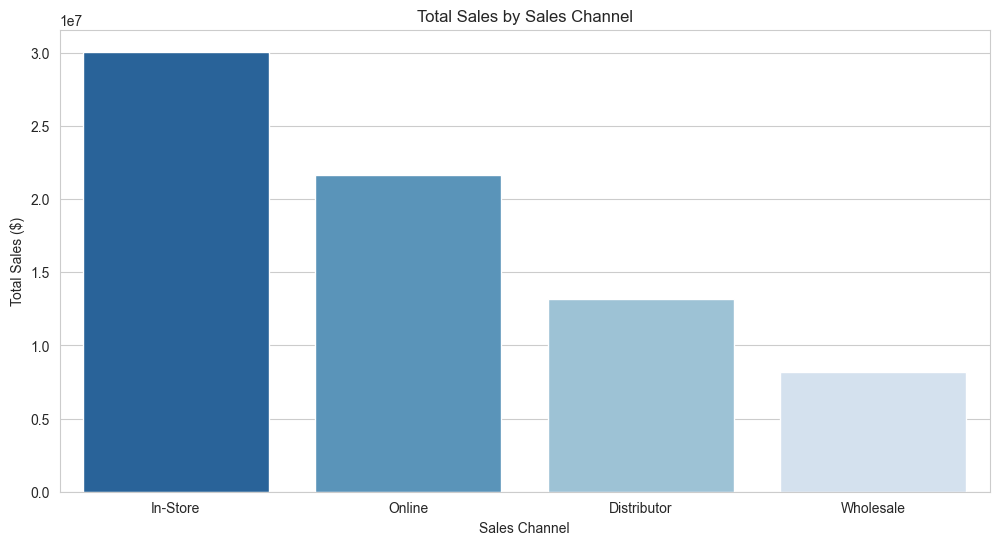

C:\Users\Kesha\AppData\Local\Temp\ipykernel_6512\2744076529.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=channel_performance, x='Sales Channel', y='Profit', palette='Greens_r')


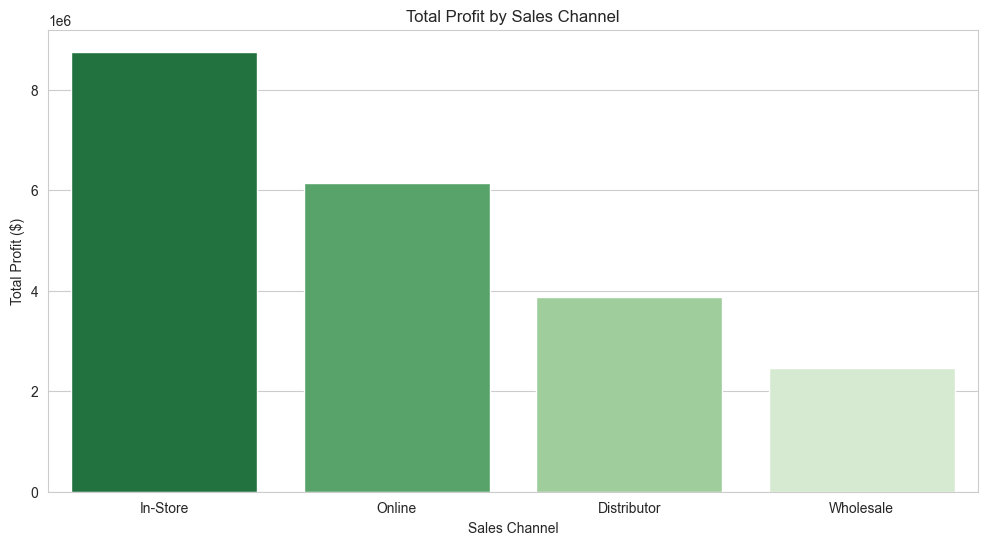

In [5]:
# --- Cell 6: Sales Channel Performance ---
if 'df_clean' in locals():
    print("\n\n--- Cell 6: Analyzing Sales Channel Performance ---")
    
    # Group by 'Sales Channel' and sum up Sales and Profit
    channel_performance = df_clean.groupby('Sales Channel')[['Sales', 'Profit']].sum().reset_index()
    
    # Sort by Sales to see which channel is biggest
    channel_performance = channel_performance.sort_values(by='Sales', ascending=False)
    
    print("\n--- Performance by Sales Channel ---")
    print(channel_performance)
    
    # Plotting Total Sales by Sales Channel
    plt.figure(figsize=(12, 6))
    sns.barplot(data=channel_performance, x='Sales Channel', y='Sales', palette='Blues_r')
    plt.title('Total Sales by Sales Channel')
    plt.ylabel('Total Sales ($)')
    plt.xlabel('Sales Channel')
    plt.show()

    # Plotting Total Profit by Sales Channel
    plt.figure(figsize=(12, 6))
    sns.barplot(data=channel_performance, x='Sales Channel', y='Profit', palette='Greens_r')
    plt.title('Total Profit by Sales Channel')
    plt.ylabel('Total Profit ($)')
    plt.xlabel('Sales Channel')
    plt.show()



--- Cell 7: Analyzing Warehouse Performance ---

--- Top 10 Warehouses by Sales ---
  WarehouseCode         Sales       Profit
2  WARE-NMK1003  2.310737e+07  6753078.014
3  WARE-PUJ1005  1.303673e+07  3816988.252
4  WARE-UHY1004  1.196735e+07  3418618.746
5  WARE-XYS1001  1.103721e+07  3116152.551
0  WARE-MKL1006  7.800158e+06  2334092.558
1  WARE-NBV1002  6.087759e+06  1779585.223


C:\Users\Kesha\AppData\Local\Temp\ipykernel_6512\4085244825.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=warehouse_performance_sales, x='WarehouseCode', y='Sales', palette='Purples_r')


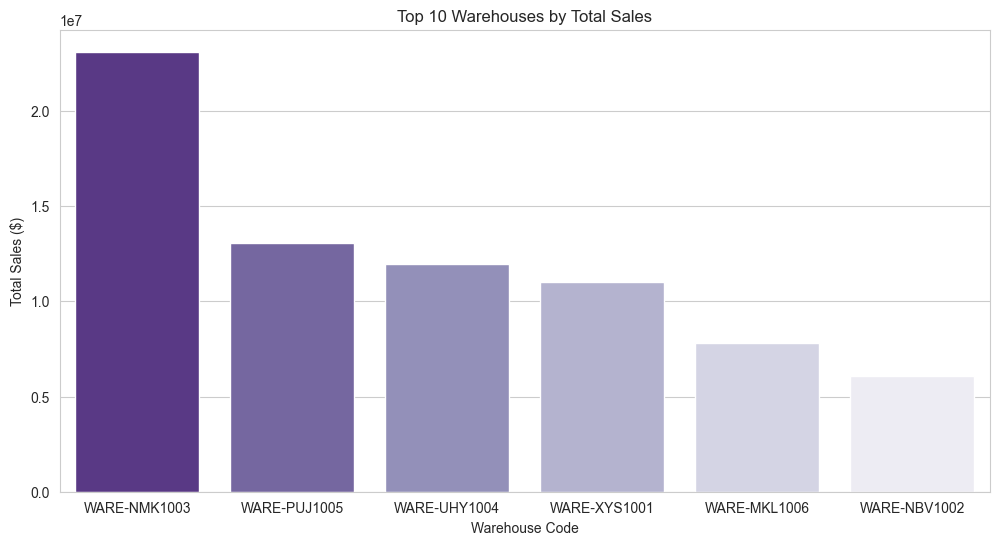

In [6]:
# --- Cell 7: Warehouse Performance ---
if 'df_clean' in locals():
    print("\n\n--- Cell 7: Analyzing Warehouse Performance ---")
    
    # Group by 'WarehouseCode' and sum up Sales and Profit
    warehouse_performance = df_clean.groupby('WarehouseCode')[['Sales', 'Profit']].sum().reset_index()
    
    # Sort by Sales
    warehouse_performance_sales = warehouse_performance.sort_values(by='Sales', ascending=False).head(10) # Top 10 by Sales
    
    # Sort by Profit
    warehouse_performance_profit = warehouse_performance.sort_values(by='Profit', ascending=False).head(10) # Top 10 by Profit
    
    print("\n--- Top 10 Warehouses by Sales ---")
    print(warehouse_performance_sales)
    
    # Plotting Top 10 Warehouses by Sales
    plt.figure(figsize=(12, 6))
    sns.barplot(data=warehouse_performance_sales, x='WarehouseCode', y='Sales', palette='Purples_r')
    plt.title('Top 10 Warehouses by Total Sales')
    plt.ylabel('Total Sales ($)')
    plt.xlabel('Warehouse Code')
    plt.show()



--- Cell 8: Analyzing Sales & Profit Over Time ---

--- Monthly Sales (Last 5 Months) ---
OrderDate
2020-08-31    2187241.666
2020-09-30    2091835.073
2020-10-31    2415433.080
2020-11-30    2296805.024
2020-12-31    2306570.743
Freq: ME, Name: Sales, dtype: float64


C:\Users\Kesha\AppData\Local\Temp\ipykernel_6512\878310059.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df_time['Sales'].resample('M').sum()
C:\Users\Kesha\AppData\Local\Temp\ipykernel_6512\878310059.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_profit = df_time['Profit'].resample('M').sum()


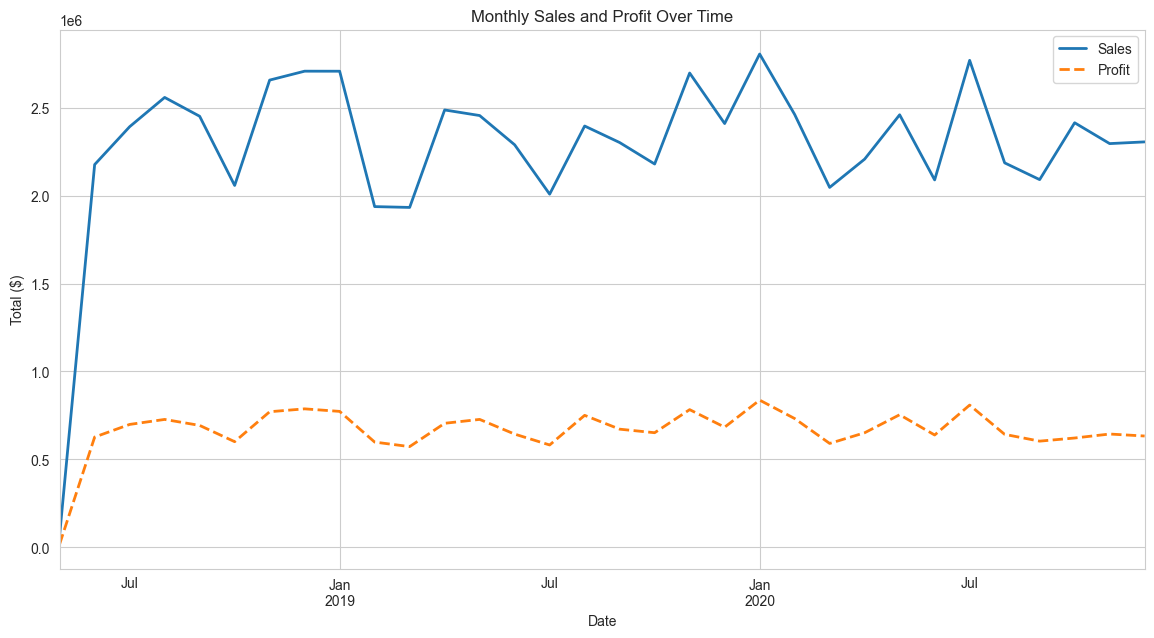

In [7]:
# --- Cell 8: Time Series Analysis (Sales & Profit Over Time) ---
if 'df_clean' in locals():
    print("\n\n--- Cell 8: Analyzing Sales & Profit Over Time ---")
    
    # We need to group by date. Resampling by month ('M') is a clean way to do this.
    # We must set 'OrderDate' as the index for resampling to work.
    df_time = df_clean.set_index('OrderDate')
    
    # Resample by month ('M' or 'ME' for month-end) and sum the values
    monthly_sales = df_time['Sales'].resample('M').sum()
    monthly_profit = df_time['Profit'].resample('M').sum()
    
    print("\n--- Monthly Sales (Last 5 Months) ---")
    print(monthly_sales.tail())
    
    # Plotting Monthly Sales
    plt.figure(figsize=(14, 7))
    monthly_sales.plot(linewidth=2, label='Sales')
    monthly_profit.plot(linewidth=2, label='Profit', linestyle='--')
    plt.title('Monthly Sales and Profit Over Time')
    plt.ylabel('Total ($)')
    plt.xlabel('Date')
    plt.legend()
    plt.show()



--- Cell 9: Analyzing Discount vs. Profit ---
Using a random sample of 1000 data points for scatter plot.


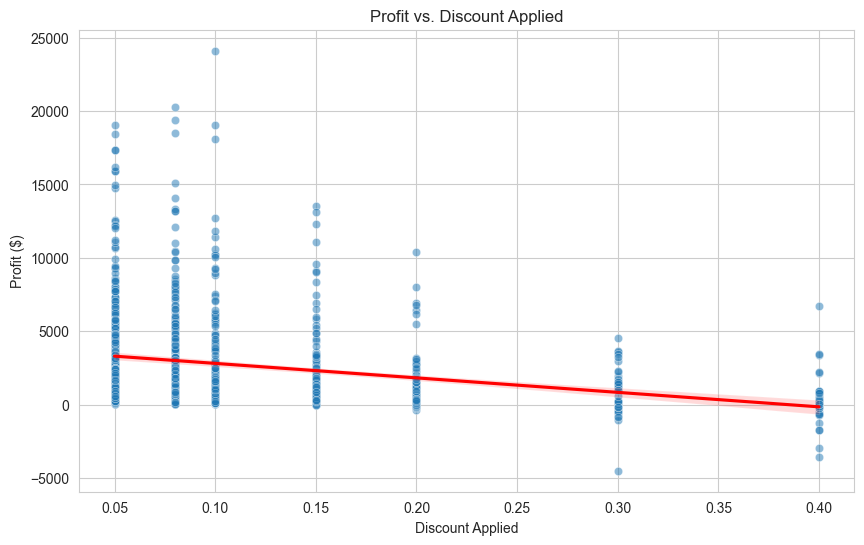


Correlation between Discount and Profit: -0.2538


In [8]:
# --- Cell 9: Discount vs. Profit ---
if 'df_clean' in locals():
    print("\n\n--- Cell 9: Analyzing Discount vs. Profit ---")
    
    # A scatter plot is perfect for this.
    # To avoid overplotting (too many dots), we can sample the data
    # Let's take a random 1000 samples if the dataset is large
    sample_df = df_clean
    if len(df_clean) > 1000:
        sample_df = df_clean.sample(1000, random_state=42)
        print("Using a random sample of 1000 data points for scatter plot.")

    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=sample_df, x='Discount Applied', y='Profit', alpha=0.5)
    
    # Add a regression line to see the trend
    sns.regplot(data=sample_df, x='Discount Applied', y='Profit', scatter=False, color='red')
    
    plt.title('Profit vs. Discount Applied')
    plt.ylabel('Profit ($)')
    plt.xlabel('Discount Applied')
    plt.show()
    
    # Let's also check the correlation
    correlation = df_clean['Discount Applied'].corr(df_clean['Profit'])
    print(f"\nCorrelation between Discount and Profit: {correlation:.4f}")



--- Cell 10: Analyzing Top 10 Products by Profit ---

--- Top 10 Most Profitable Products ---
                  Sales      Profit
_ProductID                         
23          2098372.129  648402.299
2           1773113.259  551074.699
5           1802729.805  542377.945
8           1718053.463  537195.693
35          1762855.626  522329.606
16          1671419.721  521113.461
41          1806892.448  518252.528
37          1826946.017  517249.047
17          1712109.692  503613.302
11          1646178.744  501950.404


C:\Users\Kesha\AppData\Local\Temp\ipykernel_6512\2000568499.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x=top_products.index.astype(str), y='Profit', palette='Spectral')


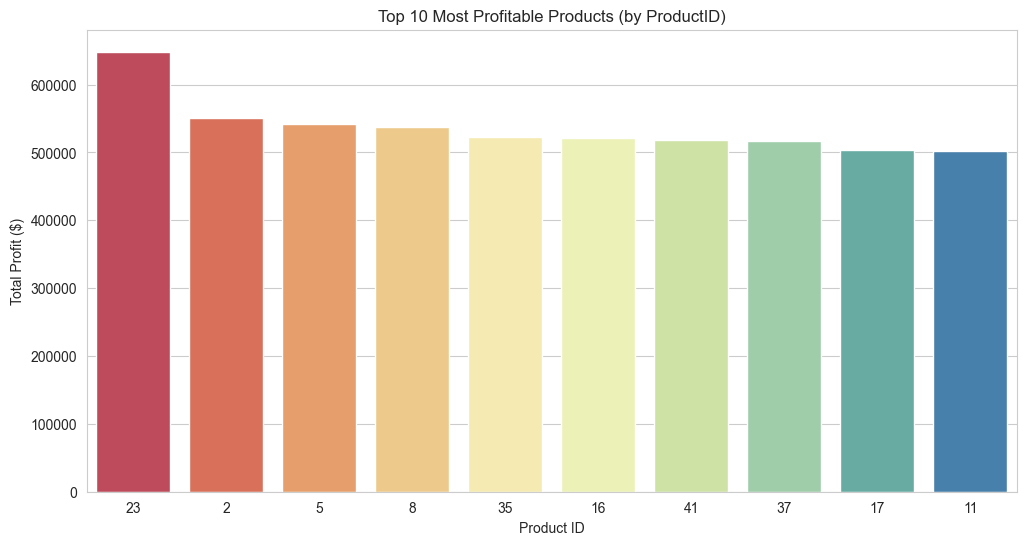

In [9]:
# --- Cell 10: Top 10 Products by Profit ---
if 'df_clean' in locals():
    print("\n\n--- Cell 10: Analyzing Top 10 Products by Profit ---")
    
    # Group by '_ProductID' and sum up Profit
    product_performance = df_clean.groupby('_ProductID')[['Sales', 'Profit']].sum()
    
    # Sort by Profit
    top_products = product_performance.sort_values(by='Profit', ascending=False).head(10)
    
    print("\n--- Top 10 Most Profitable Products ---")
    print(top_products)
    
    # Plotting Top 10 Products
    plt.figure(figsize=(12, 6))
    # Note: _ProductID is a number, but we treat it as a category, so we convert to string for plotting
    sns.barplot(data=top_products, x=top_products.index.astype(str), y='Profit', palette='Spectral')
    plt.title('Top 10 Most Profitable Products (by ProductID)')
    plt.ylabel('Total Profit ($)')
    plt.xlabel('Product ID')
    plt.show()

In [10]:
# --- Cell 11: Business KPIs Computation ---
if 'df_clean' in locals():
    print("\n\n--- Cell 11: Calculating Key Business KPIs ---")
    
    # 1. Total Sales
    total_sales = df_clean['Sales'].sum()
    
    # 2. Total Profit
    total_profit = df_clean['Profit'].sum()
    
    # 3. Average Profit Margin (%)
    avg_profit_margin = df_clean['Profit Margin (%)'].mean()
    
    # 4. Top Sales Channel by Sales
    top_channel_sales = df_clean.groupby('Sales Channel')['Sales'].sum().idxmax()
    
    # 5. Top Warehouse by Profit
    top_warehouse_profit = df_clean.groupby('WarehouseCode')['Profit'].sum().idxmax()

    # 6. Total Number of Orders
    total_orders = df_clean['OrderNumber'].nunique() # .nunique() counts unique orders

    print("--- KPI Summary ---")
    print(f"Total Sales: ${total_sales:,.2f}")
    print(f"Total Profit: ${total_profit:,.2f}")
    print(f"Average Profit Margin: {avg_profit_margin:.2f}%")
    print(f"Total Unique Orders: {total_orders:,}")
    print(f"Top Sales Channel (by Sales): {top_channel_sales}")
    print(f"Top Warehouse (by Profit): {top_warehouse_profit}")



--- Cell 11: Calculating Key Business KPIs ---
--- KPI Summary ---
Total Sales: $73,036,584.22
Total Profit: $21,218,515.34
Average Profit Margin: 28.35%
Total Unique Orders: 7,991
Top Sales Channel (by Sales): In-Store
Top Warehouse (by Profit): WARE-NMK1003



--- Cell 12: Top 10 Customers by Sales ---


C:\Users\Kesha\AppData\Local\Temp\ipykernel_6512\3942293776.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


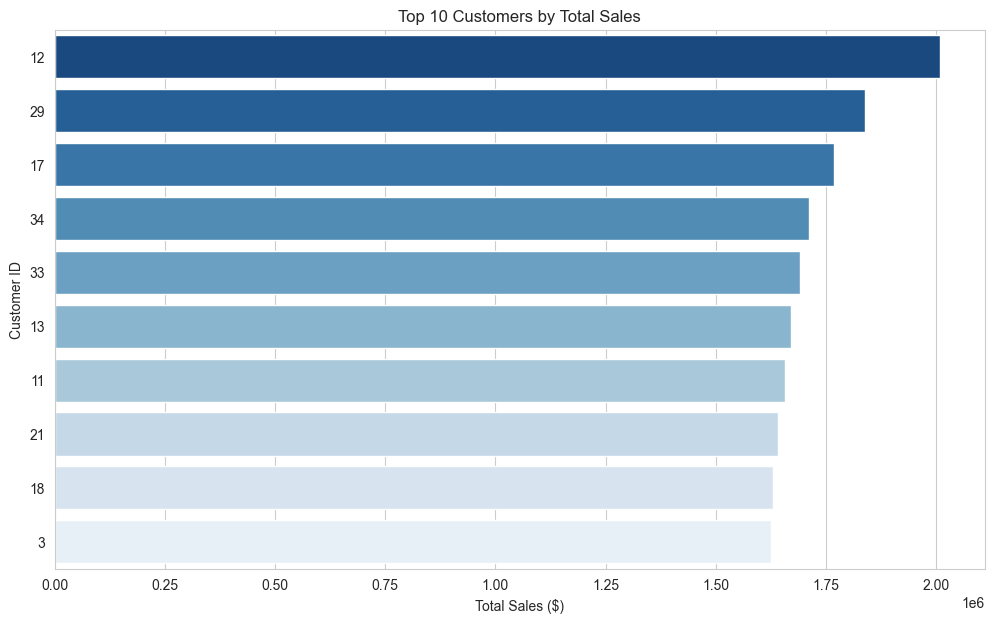

Insight: This chart identifies high-value customers who could be targeted for loyalty programs.


In [11]:
# --- Cell 12: Top 10 Customers by Sales ---
print("\n--- Cell 12: Top 10 Customers by Sales ---")
try:
    # Group by CustomerID, sum Sales, and get top 10
    top_customers = df_clean.groupby('_CustomerID')['Sales'].sum().nlargest(10).reset_index()
    
    # Convert CustomerID to string for categorical plotting
    top_customers['_CustomerID'] = top_customers['_CustomerID'].astype(str)
    
    # Plot
    plt.figure(figsize=(12, 7))
    sns.barplot(
        x='Sales',
        y='_CustomerID',
        data=top_customers.sort_values(by='Sales', ascending=False),
        palette='Blues_r'
    )
    plt.title('Top 10 Customers by Total Sales')
    plt.xlabel('Total Sales ($)')
    plt.ylabel('Customer ID')
    plt.show()
    
    print("Insight: This chart identifies high-value customers who could be targeted for loyalty programs.")

except Exception as e:
    print(f"An error occurred in Cell 12: {e}")


--- Cell 13: Top 10 Sales Teams by Profit ---


C:\Users\Kesha\AppData\Local\Temp\ipykernel_6512\3275841864.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


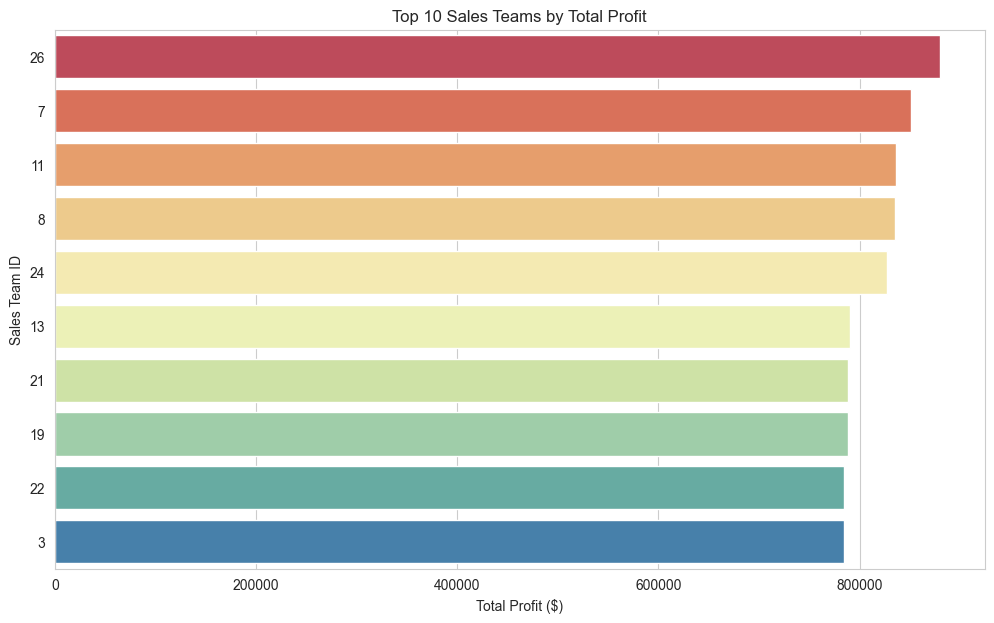

Insight: This helps identify top-performing sales teams, who could share best practices.


In [12]:
# --- Cell 13: Top 10 Sales Teams by Profit ---
print("\n--- Cell 13: Top 10 Sales Teams by Profit ---")
try:
    # Group by SalesTeamID, sum Profit, and get top 10
    top_teams = df_clean.groupby('_SalesTeamID')['Profit'].sum().nlargest(10).reset_index()
    
    # Convert SalesTeamID to string
    top_teams['_SalesTeamID'] = top_teams['_SalesTeamID'].astype(str)
    
    # Plot
    plt.figure(figsize=(12, 7))
    sns.barplot(
        x='Profit',
        y='_SalesTeamID',
        data=top_teams.sort_values(by='Profit', ascending=False),
        palette='Spectral'
    )
    plt.title('Top 10 Sales Teams by Total Profit')
    plt.xlabel('Total Profit ($)')
    plt.ylabel('Sales Team ID')
    plt.show()
    
    print("Insight: This helps identify top-performing sales teams, who could share best practices.")

except Exception as e:
    print(f"An error occurred in Cell 13: {e}")


--- Cell 14: Logistics & Shipping Analysis ---
Created logistics columns: 'Processing_Time_Days', 'Shipping_Time_Days', 'Total_Delivery_Time_Days'
       Processing_Time_Days  Shipping_Time_Days  Total_Delivery_Time_Days
count           7991.000000         7991.000000               7991.000000
mean              15.168940            5.503942                 20.672882
std                7.793951            2.855809                  8.295398
min                2.000000            1.000000                  3.000000
25%                8.000000            3.000000                 14.000000
50%               15.000000            5.000000                 21.000000
75%               22.000000            8.000000                 27.000000
max               28.000000           10.000000                 38.000000


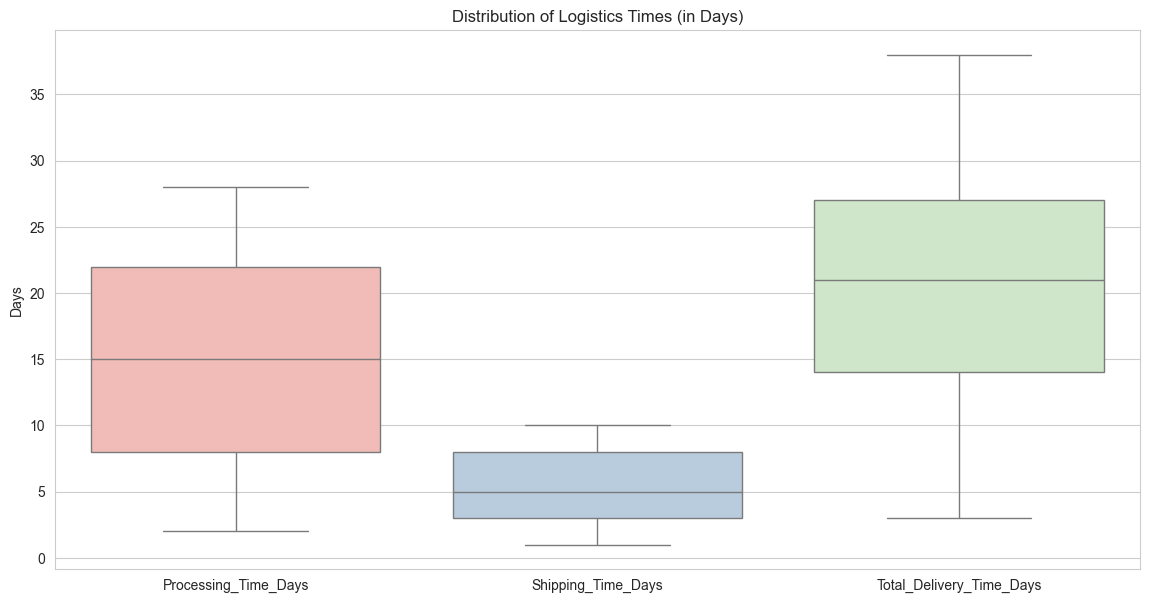

Insight: This boxplot shows the median and range (including outliers) for order processing and shipping, highlighting potential bottlenecks.
For example, we can see if processing takes longer than shipping on average.


In [13]:
# --- Cell 14: Logistics & Shipping Analysis ---
print("\n--- Cell 14: Logistics & Shipping Analysis ---")
try:
    # 1. Feature Engineering for Logistics
    # Calculate time taken from order to shipment
    df_clean['Processing_Time_Days'] = (df_clean['ShipDate'] - df_clean['OrderDate']).dt.days
    
    # Calculate time taken from shipment to delivery
    df_clean['Shipping_Time_Days'] = (df_clean['DeliveryDate'] - df_clean['ShipDate']).dt.days
    
    # Calculate total time from order to delivery
    df_clean['Total_Delivery_Time_Days'] = (df_clean['DeliveryDate'] - df_clean['OrderDate']).dt.days

    print("Created logistics columns: 'Processing_Time_Days', 'Shipping_Time_Days', 'Total_Delivery_Time_Days'")
    print(df_clean[['Processing_Time_Days', 'Shipping_Time_Days', 'Total_Delivery_Time_Days']].describe())

    # 2. Plotting Logistics Times
    # We will use a boxplot to see the distribution of these times
    plt.figure(figsize=(14, 7))
    sns.boxplot(
        data=df_clean[['Processing_Time_Days', 'Shipping_Time_Days', 'Total_Delivery_Time_Days']],
        palette='Pastel1'
    )
    plt.title('Distribution of Logistics Times (in Days)')
    plt.ylabel('Days')
    plt.show()
    
    print("Insight: This boxplot shows the median and range (including outliers) for order processing and shipping, highlighting potential bottlenecks.")
    print("For example, we can see if processing takes longer than shipping on average.")

except Exception as e:
    print(f"An error occurred in Cell 14: {e}")